# PROJECT: 

## Table of Contents
1. Introduction
2. Data wrangling
3. Exploratory Data Analysis
4. conclusion


# Introduction

### Data Set Description

The Train dataset is about car prices, colours, models, locations and year of production in nigeria  

The train dataset contains of 9 features(columns) and 7205 record(rows).

VehicleID: This is the unique identifier of the car.						
Location: This is the location in Nigeria where the seller is based.						
Maker: This is the manufacturer of the car. It is the brand name.						
Model: This is the the name of the car product within a range of similar car products.						
Year: This is the year the car was manufactured.						
Colour:	This is the colour of the car.						
Amount: (Million Naira)	This is the selling price of the car. It is the amount the company will sell the car.						
Type: This is the nature of previous use of the car, whether it was previously used within Nigeria or outside   Nigeria.						
Distance: This is the mileage of the car. It is how much distance it covered in its previous use						
							




### Quetion(s) for Analysis
1. how does location affect amount
2. what maker of car is most used in the dataset
3. how does distance affect amount
4. how many model of car do we have on the dataset
5. what year has the average amount of car sold
6. how does the colour of the car affect the amount 
7. how does the type(whether nigerian used or foreign used) after price


In [1]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Data Wrangling

In [2]:
df = pd.read_csv("/Users/user/Downloads/Train.csv")
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


## data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


replacing all space with underscore and changing all capital letters to lower case for uniform reading of data

In [4]:
#df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")

In [6]:
df.head()

,vehicleid,location,maker,model,year,colour,amount_(million_naira),type,distance
0,vhl12546,abuja,honda,accord_coupe_ex_v-6,"2,011",silver,2.2,nigerian_used,NaN
1,vhl18827,ibadan,hyundai,sonata,"2,012",silver,3.5,nigerian_used,"125,000"
2,vhl19499,lagos,lexus,rx_350,"2,010",red,9.2,foreign_used,"110,852"
3,vhl17991,abuja,mercedes-benz,gle-class,"2,017",blue,22.8,foreign_used,"30,000"
4,vhl12170,ibadan,toyota,highlander,"2,002",red,2.6,nigerian_used,"125,206"


if you notice the year column, it has some abnormality
(2,011) instead of (2011)
so I'll replace the comma in the year

also removing the comma in the distance column

In [7]:
df["year"] = df["year"].str.replace(",", "")

In [8]:
df["distance"] = df["distance"].str.replace(",","")

In [9]:
df.head()

,vehicleid,location,maker,model,year,colour,amount_(million_naira),type,distance
0,vhl12546,abuja,honda,accord_coupe_ex_v-6,2011,silver,2.2,nigerian_used,NaN
1,vhl18827,ibadan,hyundai,sonata,2012,silver,3.5,nigerian_used,125000
2,vhl19499,lagos,lexus,rx_350,2010,red,9.2,foreign_used,110852
3,vhl17991,abuja,mercedes-benz,gle-class,2017,blue,22.8,foreign_used,30000
4,vhl12170,ibadan,toyota,highlander,2002,red,2.6,nigerian_used,125206


In [10]:
df.shape

(7205, 9)

we have 9 columns and 7205 rows in the dataset 

In [11]:
df.columns

Index(['vehicleid', 'location', 'maker', 'model', 'year', 'colour',
       'amount_(million_naira)', 'type', 'distance'],
      dtype='object')

In [12]:
for x in df.columns:
    print(x," ",df[x].nunique()," ",df[x].unique(),"\n")

vehicleid   5141   ['vhl12546' 'vhl18827' 'vhl19499' ... 'vhl12205' 'vhl17562' 'vhl15246'] 

location   3   ['abuja' 'ibadan' 'lagos'] 

maker   55   ['honda' 'hyundai' 'lexus' 'mercedes-benz' 'toyota' 'acura' 'dodge'
 'nissan' 'kia' 'bmw' 'volvo' 'ford' 'land_rover' 'lincoln' 'peugeot'
 'chevrolet' 'audi' 'jaguar' 'infiniti' 'porsche' 'fiat' 'maserati'
 'volkswagen' 'suzuki' 'bentley' 'gac' 'mazda' 'scion' 'renault'
 'mitsubishi' 'mini' 'pontiac' 'cadillac' 'ferrari' 'jeep' 'buick'
 'rolls-royce' 'gmc' 'chrysler' 'lamborghini' 'citroen' 'king' 'baw'
 'saturn' 'tata' 'opel' 'jac' 'mg' 'hummer' 'subaru' 'rover' 'saab'
 'skoda' 'ivm' 'brabus'] 

model   1202   ['accord_coupe_ex_v-6' 'sonata' 'rx_350' ... 'almera_1.6_lux'
 'x5_3.0i_sports_activity' '320i_sv_premium'] 

year   33   ['2011' '2012' '2010' '2017' '2002' '2019' '2015' '2004' '2003' '2008'
 '2018' '2020' '2006' '2016' '2014' '2007' '2009' '2005' '2021' '2013'
 '2000' nan '1992' '2001' '1997' '1999' '1993' '1998' '1986' '1996' '

In [13]:
df.dtypes

vehicleid                  object
location                   object
maker                      object
model                      object
year                       object
colour                     object
amount_(million_naira)    float64
type                       object
distance                   object
dtype: object

we have 8 object and 1 float

In [14]:
df.describe()

,amount_(million_naira)
count,7188.000000
mean,11.847999
std,25.318922
min,0.450000
25%,3.500000
50%,5.650000
75%,11.662500
max,456.000000


In [15]:
df.describe(include = "object")

,vehicleid,location,maker,model,year,colour,type,distance
count,7205,7205,7205,7205,7184,7205,7008,4845
unique,5141,3,55,1202,33,21,3,3144
top,vhl18344,lagos,toyota,camry,2008,black,foreign_used,75000
freq,5,3318,2742,651,755,2128,4896,70


checking for miss value

In [16]:
df.isnull().sum()

vehicleid                    0
location                     0
maker                        0
model                        0
year                        21
colour                       0
amount_(million_naira)      17
type                       197
distance                  2360
dtype: int64

filling in the missing value 

mode for the object
and mean for the float

In [17]:
df["year"].mode() 

0    2008
Name: year, dtype: object

In [18]:
df["year"].fillna(2008, inplace = True)

In [19]:
amount_mean = df["amount_(million_naira)"].mean()

In [20]:
amount_mean

11.847999443516994

In [21]:
df["amount_(million_naira)"].fillna(amount_mean, inplace = True)

In [22]:
df["type"].mode()

0    foreign_used
Name: type, dtype: object

In [23]:
df["type"].fillna("foreign_used", inplace = True)

In [24]:
df["distance"].mode()

0    75000
Name: distance, dtype: object

In [25]:
df["distance"].fillna(75000, inplace = True)

In [26]:
df.isnull().sum()

vehicleid                 0
location                  0
maker                     0
model                     0
year                      0
colour                    0
amount_(million_naira)    0
type                      0
distance                  0
dtype: int64

changing distance from object to int

In [27]:
df["distance"] = df["distance"].astype(int)

In [28]:
df.dtypes

vehicleid                  object
location                   object
maker                      object
model                      object
year                       object
colour                     object
amount_(million_naira)    float64
type                       object
distance                    int64
dtype: object

# Exploratory Data Analysis

In [29]:
df.head()

,vehicleid,location,maker,model,year,colour,amount_(million_naira),type,distance
0,vhl12546,abuja,honda,accord_coupe_ex_v-6,2011,silver,2.2,nigerian_used,75000
1,vhl18827,ibadan,hyundai,sonata,2012,silver,3.5,nigerian_used,125000
2,vhl19499,lagos,lexus,rx_350,2010,red,9.2,foreign_used,110852
3,vhl17991,abuja,mercedes-benz,gle-class,2017,blue,22.8,foreign_used,30000
4,vhl12170,ibadan,toyota,highlander,2002,red,2.6,nigerian_used,125206


## 1. how does location affect amount

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


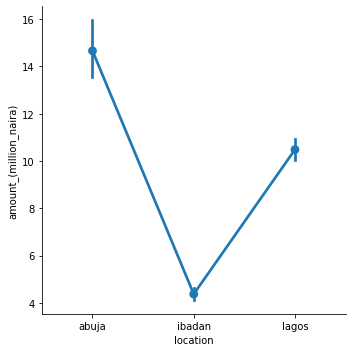

In [30]:
sns.factorplot("location", "amount_(million_naira)", data = df);

cars in abuja are the most expensive, seconded by lagos then ibadan

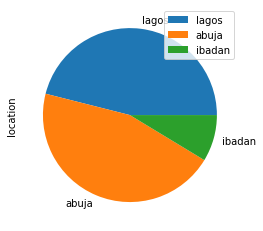

In [31]:
df["location"].value_counts().plot.pie()

plt.legend()

Ibadan has lesser cars in the dataset

## 2. what maker of car is most used in the dataset

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


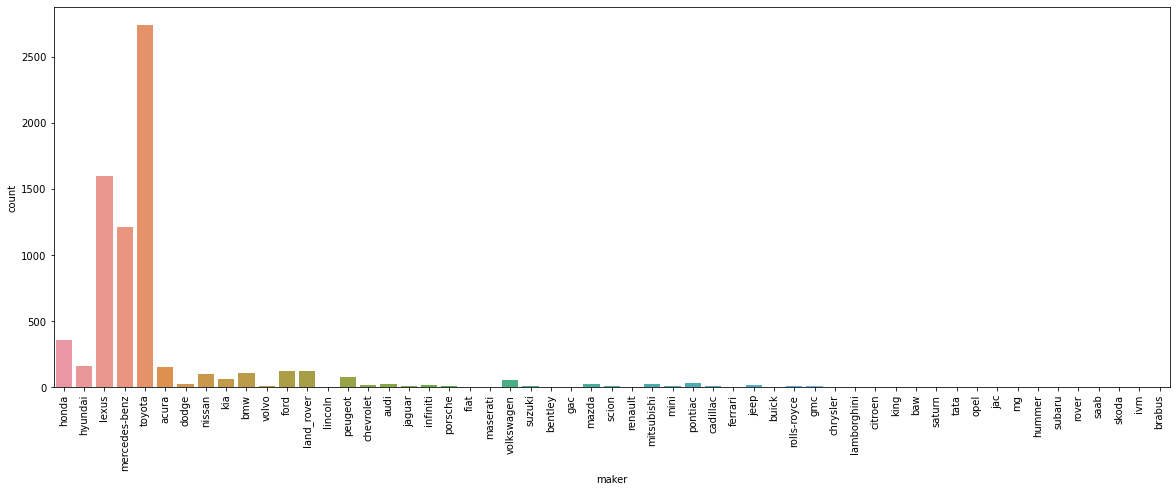

In [32]:
plt.figure(figsize = (20,7))
sns.countplot(df["maker"])
plt.xticks(rotation=90)
plt.show()

toyota is the most used with value of over 2500 count, next is lexus with value of over 1500, mercedes_benz, etc as shown by the graph above

## 3. how does distance affect amount

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance', ylabel='amount_(million_naira)'>

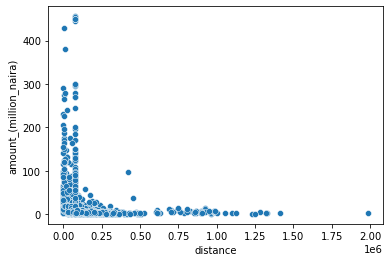

In [33]:
sns.scatterplot("distance","amount_(million_naira)", data = df)

cars with lower distance travelled cost more

## 4. how many model of car do we have on the dataset

In [34]:
df["model"].nunique()

1202

we have 1202 model of cars in the dataset

## 5. what year has the average amount of car sold

In [35]:
df_group1 = df[["location","amount_(million_naira)","year"]]
df_group1.head()

,location,amount_(million_naira),year
0,abuja,2.2,2011
1,ibadan,3.5,2012
2,lagos,9.2,2010
3,abuja,22.8,2017
4,ibadan,2.6,2002


In [36]:
df_group1 =df_group1.groupby(['year'], as_index = False).mean()
df_group1.sort_values(by='amount_(million_naira)',ascending=False)

,year,amount_(million_naira)
33,2022,113.800000
32,2021,98.680759
31,2020,41.253137
30,2019,39.656286
29,2018,24.656491
28,2017,21.804845
27,2016,19.708107
26,2015,12.697312
25,2014,10.743320
24,2013,8.881659


## 6. how does the colour of the car affect the amount 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


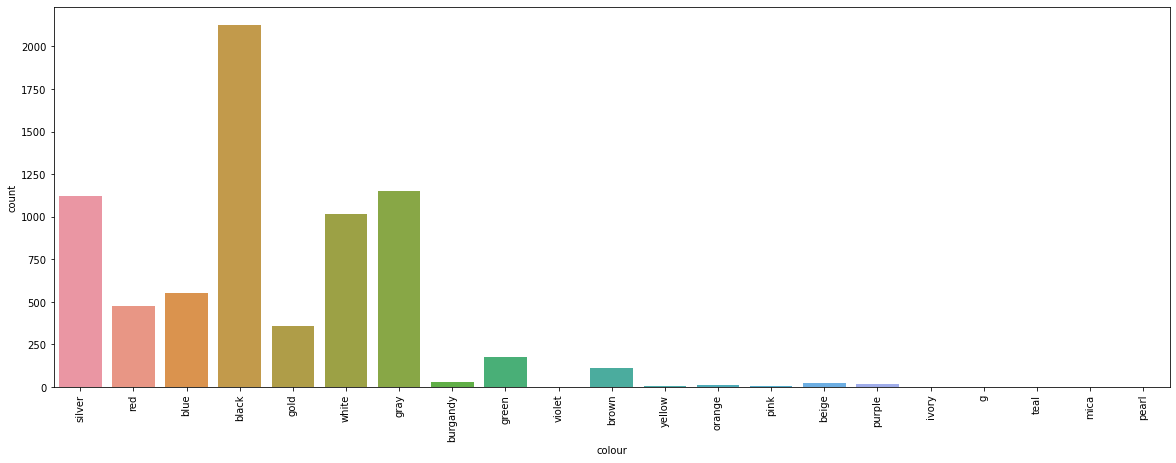

In [37]:
plt.figure(figsize = (20,7))
sns.countplot(df["colour"])
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'silver'),
  Text(1, 0, 'red'),
  Text(2, 0, 'blue'),
  Text(3, 0, 'black'),
  Text(4, 0, 'gold'),
  Text(5, 0, 'white'),
  Text(6, 0, 'gray'),
  Text(7, 0, 'burgandy'),
  Text(8, 0, 'green'),
  Text(9, 0, 'violet'),
  Text(10, 0, 'brown'),
  Text(11, 0, 'yellow'),
  Text(12, 0, 'orange'),
  Text(13, 0, 'pink'),
  Text(14, 0, 'beige'),
  Text(15, 0, 'purple'),
  Text(16, 0, 'ivory'),
  Text(17, 0, 'g'),
  Text(18, 0, 'teal'),
  Text(19, 0, 'mica'),
  Text(20, 0, 'pearl')])

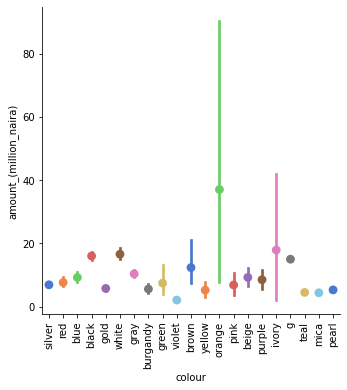

In [38]:
sns.factorplot("colour", "amount_(million_naira)", data = df, palette = "muted")
plt.xticks(rotation=90)

orange cars are the most expensive in this dataset

## 7. how does the type(whether nigerian used or foreign used) after price


first lets see how many of each we have

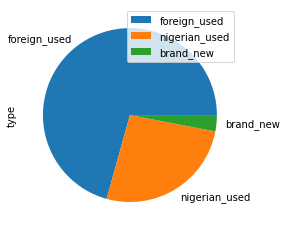

In [39]:
df["type"].value_counts().plot.pie()

plt.legend()

how the types affect the amount

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


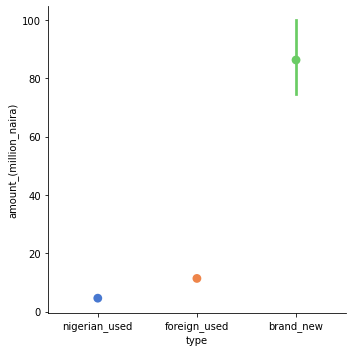

In [40]:
sns.factorplot("type", "amount_(million_naira)", data = df, palette = "muted")
#plt.xticks(rotation=90)

brand new cars are the most expensive, while nigerian used is fairly cheap.
foreign used are of moderate price

## Conclusion
I discovered that the average amount of cars is 11.85 million naira,
cars sold in abuja cost more,
location of the car affect the amount,
short distance cars cost higher than long distance,
the year a car was manufactored affect it selling price,
orange colour cars are the most expensive in this dataset.


## Limitation
1. they were many missing value in the dataset
2. the values of the year column had comma in it, which i had to clean 
3. distance values came in object, so i had to change to int64
4. they were more foreign cars causing an imbalance in the dataset 